# Exploratory Data analysis of Brain Tumor Dataset

<div style = "margin-left: 150px;">
    <img src="volume_45_slice_119_jpg.rf.738103f317d754ec678b001fc527e210.jpg" alt="MRI scan" width="550" height="550">
</div>


Welcome to the Exploratory Data Analysis (EDA) notebook for the Brain Tumor Dataset! In this notebook, we will explore the dataset of brain MRI scans, which has been annotated for object detection tasks, specifically the detection of brain tumors.


## About the Dataset

The Brain Tumor Dataset is sourced from Kaggle, and you can find it [here](https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/data). It comprises 9900 images of brain MRI scans, each with annotations for the presence and location of brain tumors.


## Loading the Data

In this section, we will load the Brain Tumor Dataset for our analysis.


In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#import seaborn as sns
import cv2
from skimage import io
import matplotlib.cm as cm
import matplotlib

Define a functions to load images and their respective labels

In [38]:
def load_images_and_labels(image_folder, label_folder):
    images = []
    labels = []
    for image_filename in os.listdir(image_folder):
        if image_filename.endswith(".jpg"):
            # Extract the base filename without the extension
            base_filename = os.path.splitext(image_filename)[0]
            # Construct the label filename based on the base filename
            label_filename = base_filename + ".txt"

            # Construct full paths for image and label
            image_path = os.path.join(image_folder, image_filename)
            label_path = os.path.join(label_folder, label_filename)

            # Check if label file exists for the current image
            if os.path.exists(label_path):
                # Load image
                img = cv2.imread(image_path)
                if img is not None:
                    images.append(img)

                    # Load labels
                    with open(label_path, 'r') as file:
                        lines = file.readlines()
                        label_data = []
                        for line in lines:
                            line = line.strip().split(' ')
                            label_data.append([float(x) for x in line])
                        labels.append(label_data)

    return images, labels

In [39]:
# load training data
training_images_folder = 'data/train/images'
training_labels_folder = 'data/train/labels'
train_images, train_labels = load_images_and_labels(training_images_folder, training_labels_folder)

# load validation data
validation_images_folder = 'data/valid/images'
validation_labels_folder = 'data/valid/labels'
validation_images, validation_labels = load_images_and_labels(validation_images_folder, validation_labels_folder)

# load test data
testing_images_folder = 'data/test/images'
testing_labels_folder = 'data/test/labels'
test_images, test_labels = load_images_and_labels(testing_images_folder, testing_labels_folder)

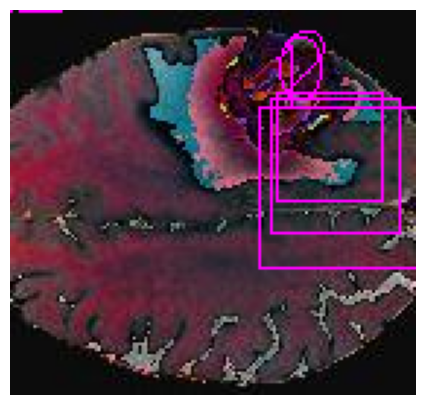

In [65]:
# Select an example image and its labels
example_index = 9 # Change this index to view different examples
example_image = train_images[example_index]
example_labels = train_labels[example_index]
height, width, _ = example_image.shape # height and width of example image

# Display example image with bounding box annotations
for i, label in enumerate(example_labels):
    class_label = int(label[0])
    x_min_norm, y_min_norm, width_norm, height_norm = label[1:]

    # Convert normalized coordinates to pixel coordinates
    x_min = int(x_min_norm * width)
    y_min = int(y_min_norm * height)
    box_width = int(width_norm * width)
    box_height = int(height_norm * height)
    x_max = x_min + box_width
    y_max = y_min + box_height

    # Change the color to pink (RGB value: 255, 0, 255)
    cv2.rectangle(example_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 255), 1)
    cv2.putText(example_image, str(class_label), (int(x_min), int(y_min)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 1)

# Convert image from BGR to RGB
example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(example_image_rgb)
plt.axis('off')
plt.show()

Now that we have viewed a sample image and its label, we can proceed with additional exploratory analysis and data processing.

# Descriptive Statistics


In [71]:
def count_annotations(dataset_labels):
    total_annotations = 0
    for labels in dataset_labels:
        total_annotations += len(labels)
    return total_annotations

# Count for training data
train_total_images = len(train_images)
train_total_annotations = count_annotations(train_labels)
print("Training Data:")
print("Total Images:", train_total_images)
print("Total Annotations:", train_total_annotations)

# Count for validation data
validation_total_images = len(validation_images)
validation_total_annotations = count_annotations(validation_labels)
print("\nValidation Data:")
print("Total Images:", validation_total_images)
print("Total Annotations:", validation_total_annotations)

# Count for test data
test_total_images = len(test_images)
test_total_annotations = count_annotations(test_labels)
print("\nTest Data:")
print("Total Images:", test_total_images)
print("Total Annotations:", test_total_annotations)

Training Data:
Total Images: 6930
Total Annotations: 15041

Validation Data:
Total Images: 1980
Total Annotations: 4380

Test Data:
Total Images: 990
Total Annotations: 2104


Across all datasets, we observe that the number of annotations exceeds the number of images. This indicates that, on average, each image has more than two annotations, suggesting that multiple tumors or regions of interest may be present in each image.

##  Class Distribution in Train, Validation, and Test Datasets

In this section, we will analyze the class distribution across the train, validation, and test datasets.

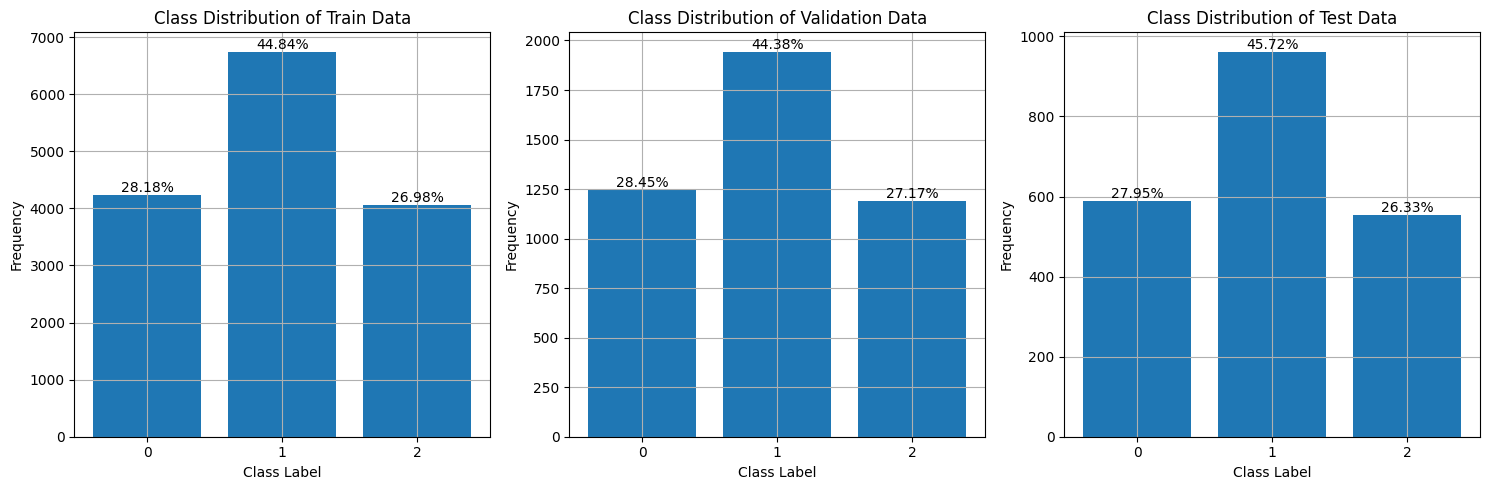

In [69]:
class_distribution_train = {}
for label_data in train_labels:
    for label in label_data:
        class_label = int(label[0])
        if class_label in class_distribution_train:
            class_distribution_train[class_label] += 1
        else:
            class_distribution_train[class_label] = 1

class_distribution_validation = {}
for label_data in validation_labels:
    for label in label_data:
        class_label = int(label[0])
        if class_label in class_distribution_validation:
            class_distribution_validation[class_label] += 1
        else:
            class_distribution_validation[class_label] = 1

class_distribution_test = {}
for label_data in test_labels:
    for label in label_data:
        class_label = int(label[0])
        if class_label in class_distribution_test:
            class_distribution_test[class_label] += 1
        else:
            class_distribution_test[class_label] = 1

# Plot histograms side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Function to add labels on top of bars
def add_labels(ax, class_distribution):
    total = sum(class_distribution.values())
    for i, (class_label, count) in enumerate(class_distribution.items()):
        percentage = count / total * 100
        ax.text(class_label, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Visualize class distributions for train data
train_keys = list(class_distribution_train.keys())
train_values = list(class_distribution_train.values())
axes[0].bar(train_keys, train_values)
add_labels(axes[0], class_distribution_train)
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Class Distribution of Train Data')
axes[0].set_xticks(train_keys)
axes[0].grid(True)

# Visualize class distributions for validation data
validation_keys = list(class_distribution_validation.keys())
validation_values = list(class_distribution_validation.values())
axes[1].bar(validation_keys, validation_values)
add_labels(axes[1], class_distribution_validation)
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Class Distribution of Validation Data')
axes[1].set_xticks(validation_keys)
axes[1].grid(True)

# Visualize class distributions for test data
test_keys = list(class_distribution_test.keys())
test_values = list(class_distribution_test.values())
axes[2].bar(test_keys, test_values)
add_labels(axes[2], class_distribution_test)
axes[2].set_xlabel('Class Label')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Class Distribution of Test Data')
axes[2].set_xticks(test_keys)
axes[2].grid(True)

plt.tight_layout()
plt.show()

Upon analysis, we observe a class imbalance across all datasets:
- **Class 0**: Represents approximately 28% of the dataset.
- **Class 1**: Represents approximately 45% of the dataset.
- **Class 2**: Represents approximately 26% of the dataset.

This imbalance could potentially pose challenges during model training and evaluation.


## Bounding Box Size Analysis

In this section, we will analyze the distribution of bounding box sizes within our dataset.

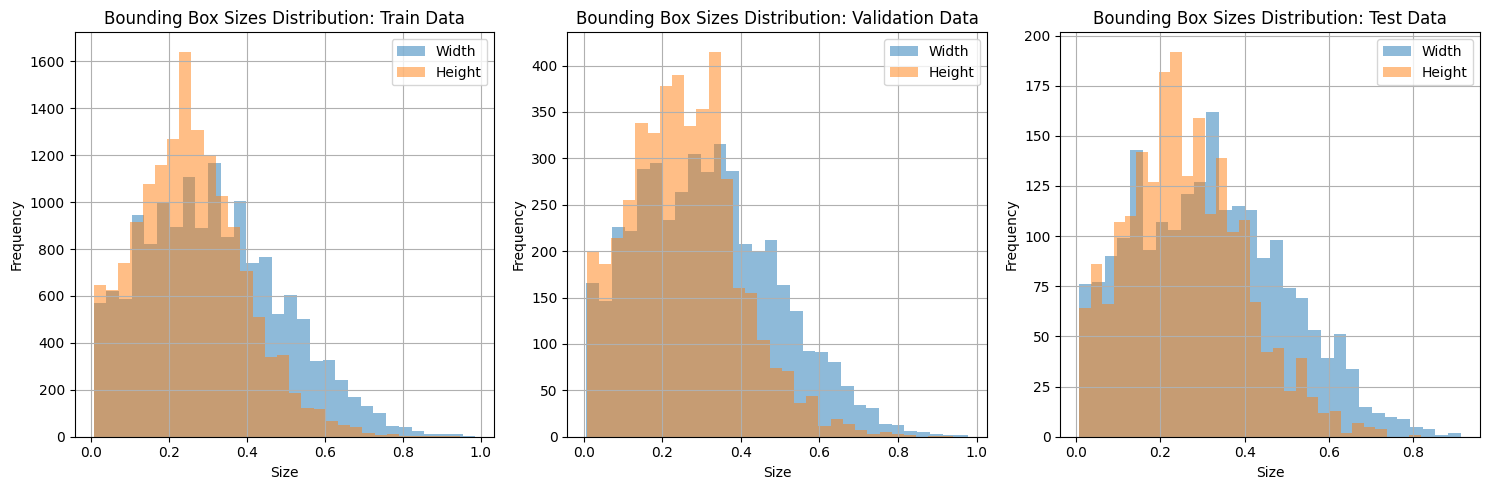

In [72]:
# Analyze bounding box sizes
bbox_sizes_train = []
for label_data in train_labels:
    for label in label_data:
        _, x, y, w, h = label
        bbox_sizes_train.append((w, h))
# Convert to numpy array for easier manipulation
bbox_sizes_train = np.array(bbox_sizes_train)

bbox_sizes_test = []
for label_data in test_labels:
    for label in label_data:
        _, x, y, w, h = label
        bbox_sizes_test.append((w, h))
# Convert to numpy array for easier manipulation
bbox_sizes_test = np.array(bbox_sizes_test)

bbox_sizes_validation = []
for label_data in validation_labels:
    for label in label_data:
        _, x, y, w, h = label
        bbox_sizes_validation.append((w, h))
# Convert to numpy array for easier manipulation
bbox_sizes_validation = np.array(bbox_sizes_validation)

# Plot histograms of bounding box sizes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Train data
axes[0].hist(bbox_sizes_train[:, 0], bins=30, alpha=0.5, label='Width')
axes[0].hist(bbox_sizes_train[:, 1], bins=30, alpha=0.5, label='Height')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Bounding Box Sizes Distribution: Train Data')
axes[0].legend()
axes[0].grid(True)

# Validation data
axes[1].hist(bbox_sizes_validation[:, 0], bins=30, alpha=0.5, label='Width')
axes[1].hist(bbox_sizes_validation[:, 1], bins=30, alpha=0.5, label='Height')
axes[1].set_xlabel('Size')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Bounding Box Sizes Distribution: Validation Data')
axes[1].legend()
axes[1].grid(True)

# Test data
axes[2].hist(bbox_sizes_test[:, 0], bins=30, alpha=0.5, label='Width')
axes[2].hist(bbox_sizes_test[:, 1], bins=30, alpha=0.5, label='Height')
axes[2].set_xlabel('Size')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Bounding Box Sizes Distribution: Test Data')
axes[2].legend()
axes[2].grid(True)


plt.tight_layout()
plt.show()

As can be seen, the distributions are right-skewed suggesting that the majority of bounding boxes have smaller sizes. We can also analyze the distribution of object sizes (bounding box dimensions) for each class individually,

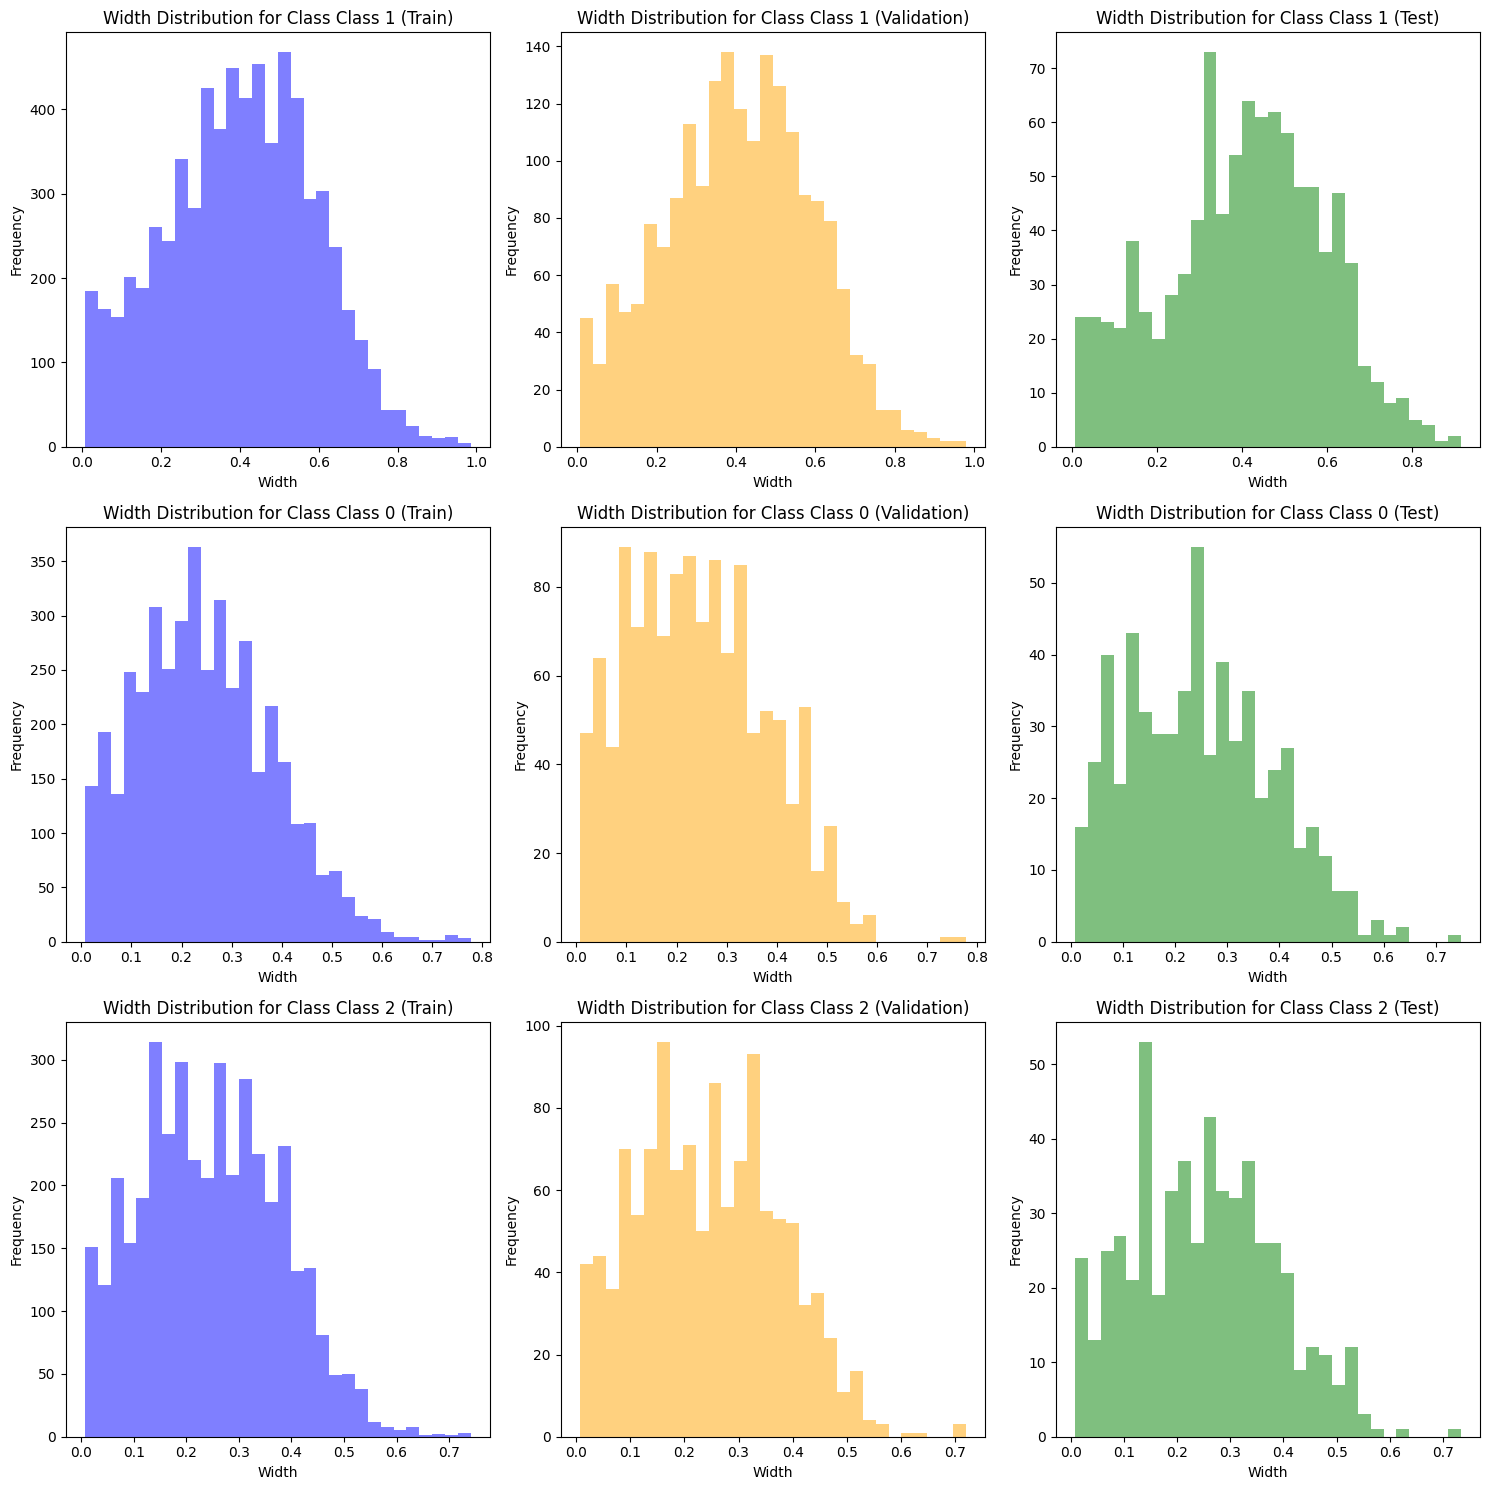

In [76]:
import matplotlib.pyplot as plt

def size_distribution_by_class(dataset_labels):
    class_sizes = {}
    for labels in dataset_labels:
        for label in labels:
            class_label = int(label[0])
            if class_label not in class_sizes:
                class_sizes[class_label] = {'width': [], 'height': []}
            class_sizes[class_label]['width'].append(label[3])
            class_sizes[class_label]['height'].append(label[4])
    return class_sizes

def plot_size_distribution(class_sizes_train, class_sizes_validation, class_sizes_test, class_names):
    num_classes = len(class_sizes_train)
    fig, axes = plt.subplots(num_classes, 3, figsize=(15, num_classes * 5))

    for i, (class_label, sizes_train) in enumerate(class_sizes_train.items()):
        axes[i, 0].hist(sizes_train['width'], bins=30, alpha=0.5, color='blue')
        axes[i, 0].set_title(f'Width Distribution for Class {class_names[class_label]} (Train)')
        axes[i, 0].set_xlabel('Width')
        axes[i, 0].set_ylabel('Frequency')

        sizes_validation = class_sizes_validation.get(class_label, {'width': [], 'height': []})
        axes[i, 1].hist(sizes_validation['width'], bins=30, alpha=0.5, color='orange')
        axes[i, 1].set_title(f'Width Distribution for Class {class_names[class_label]} (Validation)')
        axes[i, 1].set_xlabel('Width')
        axes[i, 1].set_ylabel('Frequency')

        sizes_test = class_sizes_test.get(class_label, {'width': [], 'height': []})
        axes[i, 2].hist(sizes_test['width'], bins=30, alpha=0.5, color='green')
        axes[i, 2].set_title(f'Width Distribution for Class {class_names[class_label]} (Test)')
        axes[i, 2].set_xlabel('Width')
        axes[i, 2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Calculate size distributions for each dataset
train_class_sizes = size_distribution_by_class(train_labels)
validation_class_sizes = size_distribution_by_class(validation_labels)
test_class_sizes = size_distribution_by_class(test_labels)

# Example usage:
class_names = {0: 'Class 0', 1: 'Class 1', 2: 'Class 2'}  # Replace with actual class names
plot_size_distribution(train_class_sizes, validation_class_sizes, test_class_sizes, class_names)

